<a href="https://colab.research.google.com/github/plthiyagu/Personnel/blob/master/Fake_News_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

https://www.datacamp.com/community/tutorials/scikit-learn-fake-news

In [9]:
df=pd.read_csv('https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/fakenews.csv.zip?raw=true',compression='zip')

In [10]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [11]:
df.shape

(20800, 5)

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(18285, 5)

In [15]:
## Get the Independent Features
X=df.drop('label',axis=1)

In [16]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [17]:
y= df['label']

In [19]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [23]:
messages=df.copy()

In [24]:
messages.reset_index(inplace=True)

In [25]:
messages.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [26]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [29]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus=[]
for i in range(0, len(messages)):
  review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
  review = review.lower()
  review = review.split()
    
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
corpus[3]

'civilian kill singl us airstrik identifi'

In [31]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [32]:
X.shape

(18285, 5000)

In [33]:
y=messages['label']

In [34]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [35]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [36]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [37]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [38]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,abstain,absurd,abus,abus new,abus new york,academi,accept,access,access pipelin,access pipelin protest,accid,accident,accord,account,accus,accus trump,achiev,acknowledg,acknowledg emf,acknowledg emf damag,aclu,acquit,acquitt,acr,across,act,act like,act new,act new york,action,...,yahoo,yale,ye,year,year ago,year breitbart,year eve,year later,year new,year new york,year old,year old girl,year sinc,yemen,yet,yet anoth,yiannopoulo,yield,yo,york,york citi,york new,york new york,york state,york time,yorker,young,youth,youtub,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
import matplotlib.pyplot as plt

In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [41]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [42]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.902
Confusion matrix, without normalization


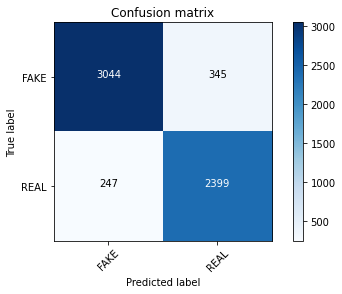

In [43]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [44]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9019055509527755

In [45]:
y_train.shape

(12250,)

In [48]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

accuracy:   0.919
Confusion matrix, without normalization


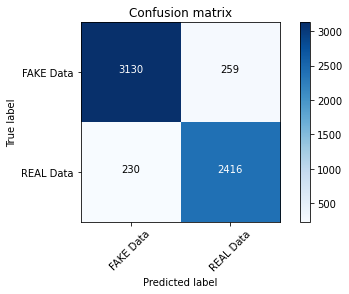

In [49]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [50]:
classifier=MultinomialNB(alpha=0.1)

In [51]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8903065451532726
Alpha: 0.1, Score : 0.9020712510356255
Alpha: 0.2, Score : 0.9025683512841757
Alpha: 0.30000000000000004, Score : 0.9024026512013256
Alpha: 0.4, Score : 0.9017398508699255
Alpha: 0.5, Score : 0.9015741507870754
Alpha: 0.6000000000000001, Score : 0.9022369511184756
Alpha: 0.7000000000000001, Score : 0.9025683512841757
Alpha: 0.8, Score : 0.9015741507870754
Alpha: 0.9, Score : 0.9017398508699255


In [52]:
## Get Features names
feature_names = cv.get_feature_names()

In [53]:
classifier.coef_[0]

array([ -9.10038883,  -8.62276128,  -9.10038883, ..., -10.79498456,
        -8.91467169,  -9.32864749])

In [54]:
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.000149156604985, 'trump'),
 (-4.287872694443541, 'hillari'),
 (-4.396389621061519, 'clinton'),
 (-4.899969726208735, 'elect'),
 (-5.176598600897756, 'new'),
 (-5.234730366348767, 'comment'),
 (-5.273968180973631, 'video'),
 (-5.3868167681180115, 'war'),
 (-5.396821854078974, 'us'),
 (-5.412019714988405, 'hillari clinton'),
 (-5.417137433425386, 'fbi'),
 (-5.48068448454208, 'vote'),
 (-5.566255475855405, 'email'),
 (-5.578238842742501, 'world'),
 (-5.634015380199913, 'obama'),
 (-5.734501455772904, 'donald'),
 (-5.763095255139644, 'donald trump'),
 (-5.785090276725191, 'russia'),
 (-5.846224665218559, 'day'),
 (-5.862110622807369, 'america')]

In [55]:
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.794984555596727, 'abe'),
 (-10.794984555596727, 'abroad'),
 (-10.794984555596727, 'abus new'),
 (-10.794984555596727, 'abus new york'),
 (-10.794984555596727, 'act new'),
 (-10.794984555596727, 'act new york'),
 (-10.794984555596727, 'advic'),
 (-10.794984555596727, 'advis new'),
 (-10.794984555596727, 'advis new york'),
 (-10.794984555596727, 'age new'),
 (-10.794984555596727, 'age new york'),
 (-10.794984555596727, 'agenda breitbart'),
 (-10.794984555596727, 'ail'),
 (-10.794984555596727, 'aleppo new'),
 (-10.794984555596727, 'aleppo new york'),
 (-10.794984555596727, 'ali'),
 (-10.794984555596727, 'america breitbart'),
 (-10.794984555596727, 'america new york'),
 (-10.794984555596727, 'american breitbart'),
 (-10.794984555596727, 'american new'),
 (-10.794984555596727, 'american new york'),
 (-10.794984555596727, 'ami'),
 (-10.794984555596727, 'ami schumer'),
 (-10.794984555596727, 'amp'),
 (-10.794984555596727, 'ann'),
 (-10.794984555596727, 'ann coulter'),
 (-10.794984555596